# Supervised Learning:
    Training datasets should Labeled Data (input features and desired output).
    
    1. Regression (Continuous Data): Output values is the probabalistic output after considering correlations among the input features. 
    2. Classification (Discrete Data): Grouping data into classes.
    

    
    
### 1. Linear Regression
Predict a dependent variable (labels) based on independent input variables(features) and find linear relationships between them.
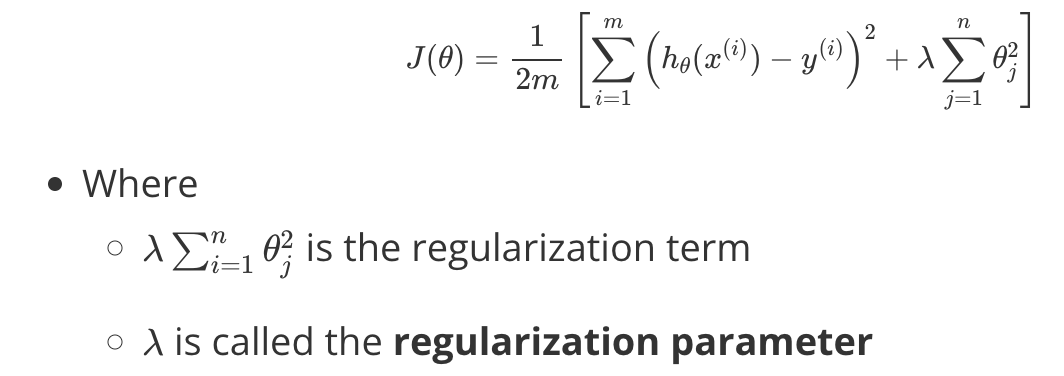

**Pros:**
1. Easy to implement
2. Less complexity

**Cons:**
1. Badly affected by outliers
2. Prone to noise and overfitting (can be overcome by using regularization and dimentionality reduction).
3. Oversimplify real life problems by assuming linear relations among the variables. 

**Usecases:**
1. Trend Evaluations: Forecasting and time-series analysis.
2. Sales Predictions
3. Risk Analysis
4. Predicting house prices

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X = diabetes_X[:, np.newaxis, 2]
print(type(diabetes_X))
print(type(diabetes_y))
print(diabetes_X.shape)
print(diabetes_X[0], diabetes_y[0])

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(442, 1)
[0.06169621] 151.0


In [9]:
sr = int(diabetes_X.shape[0]*(0.8)) # 80:20
#print(sr)

diabetes_X_train = diabetes_X[:sr]
diabetes_X_test = diabetes_X[sr:]


diabetes_y_train = diabetes_y[:sr]
diabetes_y_test = diabetes_y[sr:]

print(diabetes_X_test.shape)
print(diabetes_y_test.size)

353
(89, 1)
89


In [12]:
lr_model = linear_model.LinearRegression()
lr_model.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

In [14]:

diabetes_y_pred = lr_model.predict(diabetes_X_test)
print('Coefficients: \n', lr_model.coef_)

Coefficients: 
 [957.76202681]


In [15]:
print('Mean squared error: %.2f' % mean_squared_error(diabetes_y_test, diabetes_y_pred))
print('Coefficient of determination: %.2f'% r2_score(diabetes_y_test, diabetes_y_pred))

Mean squared error: 4079.82
Coefficient of determination: 0.36


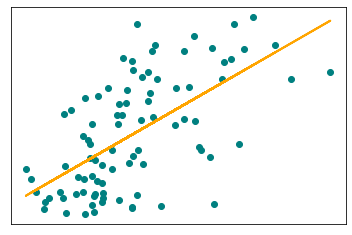

In [17]:
plt.scatter(diabetes_X_test, diabetes_y_test, color="teal")
plt.plot(diabetes_X_test, diabetes_y_pred,color = 'orange',linewidth = 2)
plt.xticks(())
plt.yticks(())
plt.show()

### 2. Logistic Regression

Logistic Regression is used for the data with categorical labels(Binary/multi-class classification). Uses sigmoid activation function. 

![Logistic Regression]['images/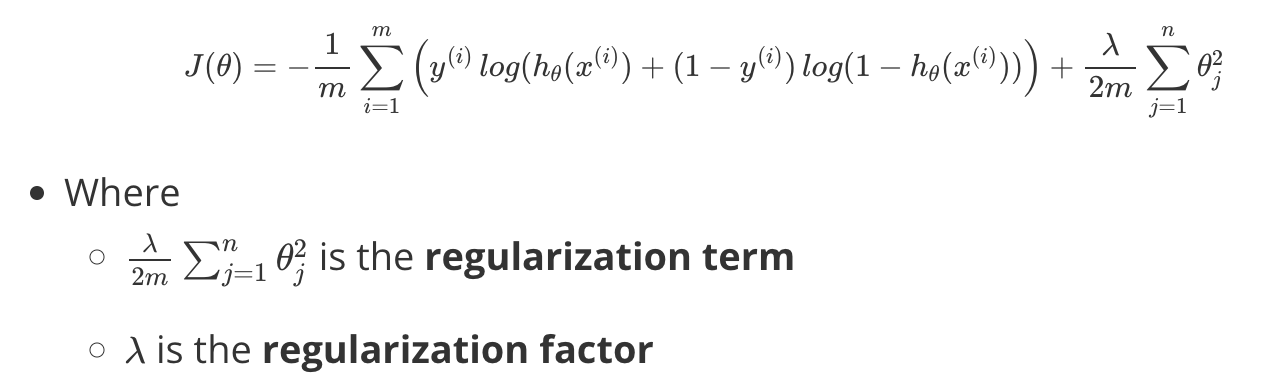logreg.png']


**Pros:**
1. Easy to implement
2. Best for binary classifications

**Cons:**
1. like Linear regression can't solve real-life non-linear problems
2. prone to overfitting

**Usecases:**
1. Binary classification


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.datasets import load_digits

digits = load_digits()

In [3]:
print('Image Data Shape', digits.data.shape)
print('Label Data Shape', digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


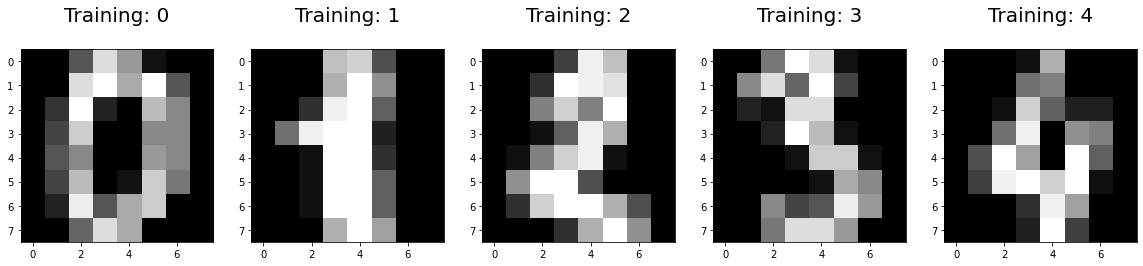

In [5]:
plt.figure(figsize =(20,4))
for ind, (img, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, ind + 1)
    plt.imshow(np.reshape(img, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)
    

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [8]:
logisticRegr = linear_model.LogisticRegression()

In [9]:
logisticRegr.fit(x_train, y_train)

/Users/takshshilarawat/opt/anaconda3/envs/nlp/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [10]:
logisticRegr.predict(x_test[0].reshape(1,-1))

array([2])

In [11]:
logisticRegr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

### 3. Decision Tree

Applied to all those data contains numerical and categorical features, good at capturing non-linear features. 

**Pros:**
1. Good at capturing non-linear featues
2. Matches human level thinking, very intuitive to understand the data. 

**Cons:**
1. very sensitive to data, small change in data leads to big difference in the tree structure. 
2. Gives low prediction accuracy in comparison to other ML algorithms
3. Prone to overfitting

**Usecases:**
1. Data exploration
2. Pattern recognition
3. Price prediction



In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree

In [2]:
def importdata():
    balance_data = pd.read_csv("https://archive.ics.uci.edu/ml/"
                               + "machine-learning-databases/balance-scale/balance-scale.data",
                           sep = ',', header = None)
    print(len(balance_data))
    print(balance_data.shape)
    print(balance_data.head())
    return balance_data

In [3]:
def splitdataset(balance_data):
    x = balance_data.values[:,1:5]
    y = balance_data.values[:,0]
    x_train, x_test, y_train, y_test = train_test_split(
                            x, y, test_size = 0.3, random_state = 100)
    return x, y, x_train, x_test, y_train, y_test

In [4]:
# Training with giniIndex
'''
GiniIndex(gini-impurity): amount of probability of a specific feature 
                        that is classified incorrectly when selected rondomly
'''
def train_using_gini(x_train, x_test, y_train):
    clf_gini = DecisionTreeClassifier(criterion = "gini",
    random_state = 100, max_depth = 3, min_samples_leaf = 5)
    clf_gini.fit(x_train,y_train)
    return clf_gini

In [5]:
def train_using_entropy(x_train,x_test,y_train):
    clf_entropy = DecisionTreeClassifier(
    criterion = "entropy", random_state = 100,
    max_depth = 3, min_samples_leaf = 5)
    clf_entropy.fit(x_train,y_train)
    return clf_entropy

In [6]:
def prediction(x_test,clf_object):
    y_pred = clf_object.predict(x_test)
    print(f"Predicted values: {y_pred}")
    return y_pred

In [7]:
def cal_accuracy(y_test, y_pred):
    print(accuracy_score(y_test, y_pred) * 100)
    print(classification_report(y_test, y_pred))

In [9]:
data = importdata()
x,y,x_train,x_test,y_train,y_test = splitdataset(data)

625
(625, 5)
   0  1  2  3  4
0  B  1  1  1  1
1  R  1  1  1  2
2  R  1  1  1  3
3  R  1  1  1  4
4  R  1  1  1  5


In [10]:
clf_gini = train_using_gini(x_train, x_test, y_train)
clf_entropy = train_using_entropy(x_train, x_test, y_train)
y_pred_gini = prediction(x_test, clf_gini)
y_pred_entropy = prediction(x_test, clf_entropy)

Predicted values: ['R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'R' 'L'
 'L' 'R' 'L' 'R' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L'
 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'R' 'L' 'R'
 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'R' 'L'
 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L'
 'L' 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R'
 'L' 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R'
 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R'
 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'R']
Predicted values: ['R' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'L'
 'L' 'R' 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'L' 'L'
 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'L' 'R' '

In [17]:
print(clf_gini.get_depth())
print(clf_gini.get_params())
print(clf_gini.get_n_leaves())


3
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 5, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 100, 'splitter': 'best'}
8


In [15]:
cal_accuracy(y_test, y_pred_gini)
#cal_accuracy(y_test, y_pred_entropy)

73.40425531914893
              precision    recall  f1-score   support

           B       0.00      0.00      0.00        13
           L       0.73      0.79      0.76        85
           R       0.74      0.79      0.76        90

    accuracy                           0.73       188
   macro avg       0.49      0.53      0.51       188
weighted avg       0.68      0.73      0.71       188



/Users/takshshilarawat/opt/anaconda3/envs/nlp/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/takshshilarawat/opt/anaconda3/envs/nlp/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/takshshilarawat/opt/anaconda3/envs/nlp/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

### 4. Support Vector Machine 

SVM is used for both classification and regressions problems, commonly used for the classification task. It plots the lines to categorize the data and calculates vectors to optimize the line, ensuring that the closest point in each group lies farthest from each other. 

**Pros:**
1. Accuracy
2. More effective with higher dimentionality data.
3. Work well with smaller datasets

**Cons:**
1. Not suitable for large or overlapping datasets.
2. Not suitable for datasets where number of features > number of samples


**Usecases**
1. Spam detections
2. Image recognition

In [9]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics

import matplotlib.pyplot as plt
import numpy as np

#Load dataset
cancer = datasets.load_breast_cancer()

In [5]:
print("Features: ", cancer.feature_names)
print("Labels: ", cancer.target_names)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']


In [7]:
cancer.data.shape

(569, 30)

In [10]:
X_train, X_test, y_train, y_test=train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109)

In [11]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [12]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9649122807017544


In [13]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9811320754716981
Recall: 0.9629629629629629


### 5. Naive Bayes

Based on bayes theorem, naive bayes classifer is a probabilistic machine learning model used for classification tasks. It assumes predicates/features are independent. 

**Why naive?:** 
1. treat all word orders same (dear friend == friend dear)
2. assume features are independent of each other

**Pros:**
1. Work well in practice because it has low variance
2. Require small train data to estimate test data

**Cons:**
1. High bias since it ignores relations between words. 
2. In real-world features are not independent

**Usecases**
1. Spam filtering
2. Sentiment prediction
3. Document classification


In [14]:
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [15]:
iris = datasets.load_iris()
x = iris.data
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)


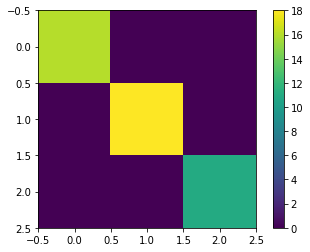

In [16]:
gnb = GaussianNB()
mnb = MultinomialNB()
y_pred_gnb = gnb.fit(x_train, y_train).predict(x_test)
cnf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)
plt.imshow(cnf_matrix_gnb)
plt.colorbar()
plt.show()

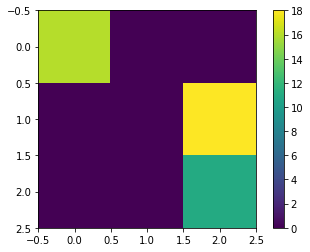

In [17]:
mnb = MultinomialNB()
y_pred_mnb = mnb.fit(x_train, y_train).predict(x_test)
cnf_matrix_mnb = confusion_matrix(y_test, y_pred_mnb)
plt.imshow(cnf_matrix_mnb)
plt.colorbar()
plt.show()

### 6. K-Nearest Neighbor

'Birds of a feather flock together'
Supervised ML algorithm used for classification and regression, but mostly for classification. Employes the idea of similararity.

    1. Regresstion: returns mean of k-lables
    2. Classification: returns mode of k-lables.
    
 
**Pros:**
1. Using Instance-based learning, it does not derive any discriminant function during training period. It stores training data and learns from it to make real-time prediction
2. There’s no need to build a model, tune several parameters, or make additional assumptions.
3. 

**Cons:**
1. HDoes not work well with large dataset or higher dimension dataset as both degrades the performance of the algorithm. 
2. Very sensitive to noise or outliers.

**Usecases**
1. Recommender system
2. Text mining




In [20]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt

In [14]:
iris = load_iris()
data = iris.data
target = iris.target

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.25, random_state = 0)

In [7]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.9736842105263158

In [18]:
k_range = range(1, 26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
print(scores)

[0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9473684210526315, 0.9473684210526315]


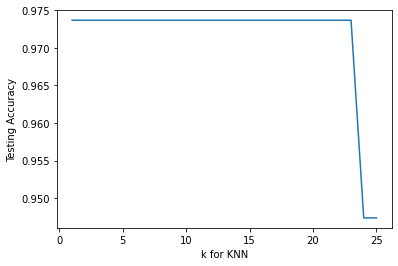

In [21]:
plt.plot(k_range, scores)
plt.xlabel('k for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

### 7. Random Forest
Consists of large number of decision trees that operates as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction - the wisdom of crowds.  Can be used in both regression and classification tasks.

**Bagging:** Sampling each individual tree randomly from the datasets with replacement, resulting in different trees. 

**Pros:**
1. Reduces overfitting in decision trees and improves accuracy.
2. Using rule based approach, data normalization is not required.
3. Gives higher accuracy through cross validations. 
3. Random forest classifier can handle the missing values and maintain the accuracy of a large proportion of data.
4. If there are more trees, it doesn’t allow over-fitting trees in the model.
5. Ability to work with large datasets with higher dimentionality. 

**Cons:**
1. Requires a lot computational power, as it builds multiple trees.
2. Due to ensembling, it fails to determine the significance of each feature.

**Usecases:**
1. Feature Selection
2. Drug and disease analysis



In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [9]:

X, y = make_classification(n_samples=1000, n_features=4,n_informative=2, n_redundant=0, random_state=0, shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [10]:

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [12]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.952

# Unsupervised Learning

### 1. K-means Clustering

It divides data into k clusters, which is determined using elbow methods. 

**Pros:**
1. Easy to implement. 
2. Fast with better computational cost
3. Gives best results even if data is distinct. Even better with spherical data

**Cons:**
1. Can't work with overlapping data points. 
2. Can't work with noisy and outliers.

**Usecases:**
1. Document clustering
2. Search engine optimization






In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.cluster import KMeans


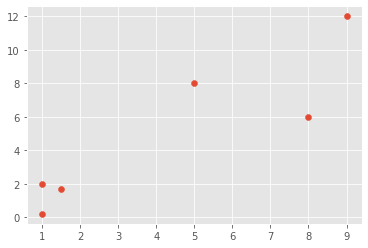

In [4]:
style.use('ggplot')
x = [1,5,1.5,8,1,9]
y = [2,8,1.7,6,0.2,12]
plt.scatter(x, y)




In [5]:
x = np.array([[1,2],[5,8],[1.5,1.8],[8,8],[1,0.6],[9,11]])

# Creating classifier object
kmeans = KMeans(n_clusters = 2)
kmeans.fit(x)

KMeans(n_clusters=2)

In [7]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
print(centroids)
print(labels)

[[7.33333333 9.        ]
 [1.16666667 1.46666667]]
[1 0 1 0 1 0]


[1. 2.] 1
[5. 8.] 0
[1.5 1.8] 1
[8. 8.] 0
[1.  0.6] 1
[ 9. 11.] 0


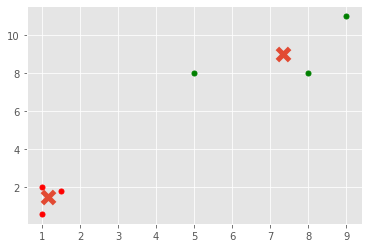

In [8]:
colors = ['g.','r.','c.','y.']
for i in range(len(x)):
    print(x[i], labels[i])
    plt.plot(x[i][0], x[i][1], colors[labels[i]], markersize = 10)
plt.scatter(centroids[:,0], centroids[:,1], marker = 'x', s = 150, linewidths = 5, zorder = 10)
plt.show()